In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('/kaggle/input/credit-score-classification/train.csv', index_col='ID')
train_data.head(10)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  

# EXPLORATORY DATA ANALYSIS

In [4]:
train_data.drop(columns=['SSN', 'Name'], axis=1, inplace=True)

In [5]:
# Categorical Cols
categorical_cols = [c for c in train_data.columns if train_data[c].dtype == 'object']

In [6]:
for col in categorical_cols:
    print(f"Unique Values of {col}")
    print(train_data[col].unique())
    print("==================================================")

Unique Values of Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique Values of Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Num_of_Loan
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1

In [7]:
for col in categorical_cols:
    train_data[col] = train_data[col].str.strip('_')

    try:
        train_data[col] = train_data[col].astype('float64')
    except:
        train_data[col] = train_data[col]
        

for col in categorical_cols:
    train_data[col] = train_data[col].replace({'':np.nan})

    try:
        train_data[col] = train_data[col].astype('float64')
    except:
        train_data[col] = train_data[col]

for col in categorical_cols:
    train_data[col] = train_data[col].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan})

In [8]:
train_data[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              100000 non-null  object 
 1   Month                    100000 non-null  object 
 2   Age                      100000 non-null  float64
 3   Occupation               92938 non-null   object 
 4   Annual_Income            100000 non-null  float64
 5   Num_of_Loan              100000 non-null  float64
 6   Type_of_Loan             88592 non-null   object 
 7   Num_of_Delayed_Payment   92998 non-null   float64
 8   Changed_Credit_Limit     97909 non-null   float64
 9   Credit_Mix               79805 non-null   object 
 10  Outstanding_Debt         100000 non-null  float64
 11  Credit_History_Age       90970 non-null   object 
 12  Payment_of_Min_Amount    100000 non-null  object 
 13  Amount_invested_monthly  95521 non-null   float64
 14  Pay

In [9]:
credit_age = []
for i in train_data['Credit_History_Age']:
    credit_age.append(str(i).split(' ')[0])
    
train_data['Credit_History_Age'] = credit_age

train_data['Credit_History_Age'] = train_data['Credit_History_Age'].replace({'nan':np.nan})
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].astype('float64')

In [10]:
numerical_cols = [col for col in train_data.columns if (train_data[col].dtype == 'int64') | (train_data[col].dtype == 'float64')]

for x in list(numerical_cols):
    q75,q25 = np.percentile(train_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_data.loc[train_data[x] < min,x] = np.nan
    train_data.loc[train_data[x] > max,x] = np.nan

In [11]:
train_data.drop(columns=['Type_of_Loan'], axis=1, inplace=True)

<AxesSubplot:>

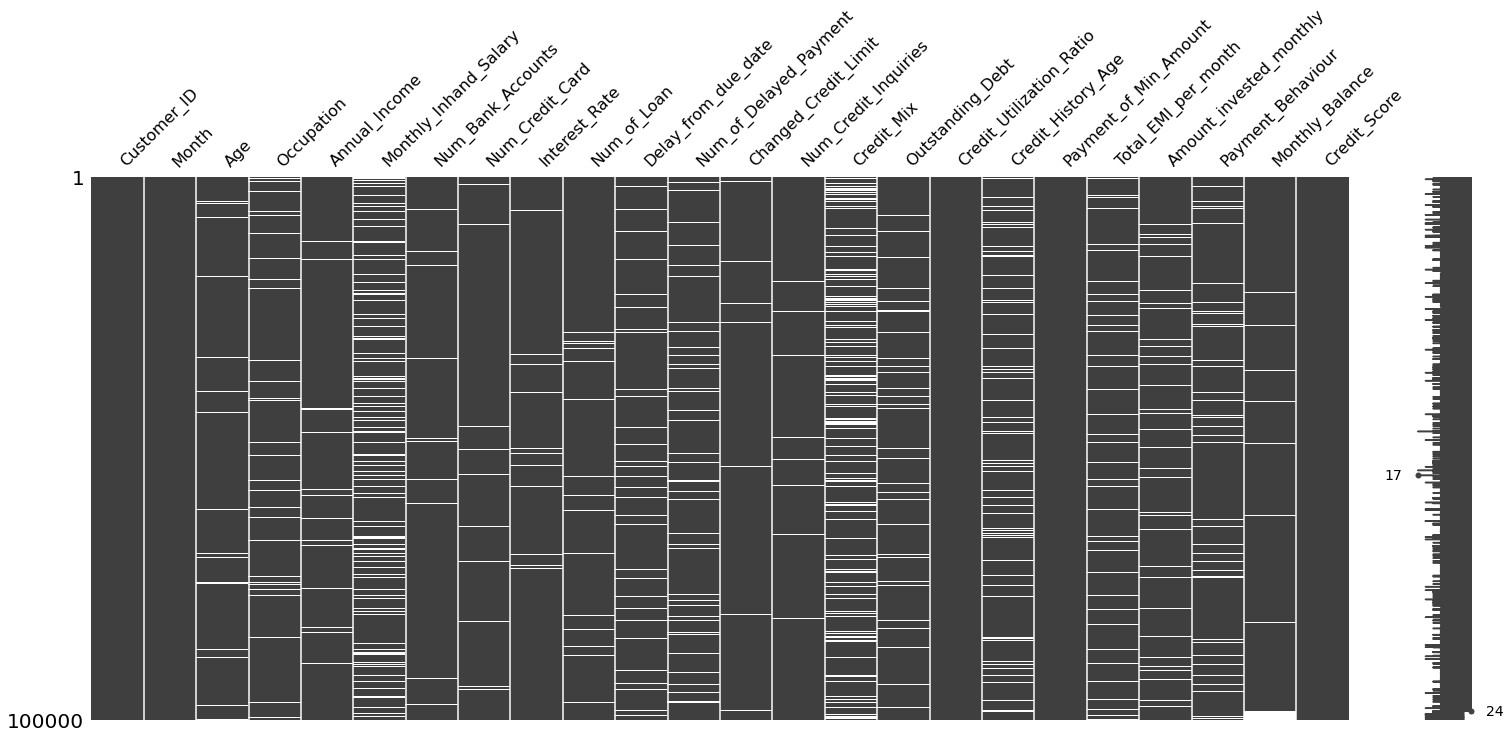

In [12]:
msno.matrix(train_data)

In [13]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Age                          2781
Occupation                   7062
Annual_Income                2783
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Delay_from_due_date          4002
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             5272
Credit_Utilization_Ratio        4
Credit_History_Age           9030
Total_EMI_per_month          6795
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
dtype: int64

In [14]:
missing_cols = [col for col in missing.index]
missing_cols.append('Customer_ID')
missing_cols

['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Customer_ID']

In [15]:
missing_cols_set = set(missing_cols)
missing_cols_set

{'Age',
 'Amount_invested_monthly',
 'Annual_Income',
 'Changed_Credit_Limit',
 'Credit_History_Age',
 'Credit_Mix',
 'Credit_Utilization_Ratio',
 'Customer_ID',
 'Delay_from_due_date',
 'Interest_Rate',
 'Monthly_Balance',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_Credit_Inquiries',
 'Num_of_Delayed_Payment',
 'Num_of_Loan',
 'Occupation',
 'Outstanding_Debt',
 'Payment_Behaviour',
 'Total_EMI_per_month'}

In [16]:
# numerical cols with missing values
numerical_cols_set = {col for col in train_data.columns if (train_data[col].dtype=='int64') | (train_data[col].dtype=='float64')}
numerical_cols_missing = [col for col in numerical_cols_set.intersection(missing_cols_set)]
numerical_cols_missing.append('Customer_ID')

In [17]:
numerical_cols_missing

['Credit_History_Age',
 'Monthly_Balance',
 'Annual_Income',
 'Amount_invested_monthly',
 'Num_Bank_Accounts',
 'Age',
 'Num_Credit_Card',
 'Num_of_Delayed_Payment',
 'Total_EMI_per_month',
 'Outstanding_Debt',
 'Interest_Rate',
 'Monthly_Inhand_Salary',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Credit_Utilization_Ratio',
 'Num_Credit_Inquiries',
 'Customer_ID']

In [18]:
train_data[numerical_cols_missing].head(50)

,Credit_History_Age,Monthly_Balance,Annual_Income,Amount_invested_monthly,Num_Bank_Accounts,Age,Num_Credit_Card,Num_of_Delayed_Payment,Total_EMI_per_month,Outstanding_Debt,Interest_Rate,Monthly_Inhand_Salary,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Credit_Utilization_Ratio,Num_Credit_Inquiries,Customer_ID
ID,,,,,,,,,,,,,,,,,,
0x1602,22.0,312.494089,19114.12,80.415295,3.0,23.0,4.0,7.0,49.574949,809.98,3.0,1824.843333,4.0,3.0,11.27,26.822620,4.0,CUS_0xd40
0x1603,NaN,284.629162,19114.12,118.280222,3.0,23.0,4.0,NaN,49.574949,809.98,3.0,NaN,4.0,-1.0,11.27,31.944960,4.0,CUS_0xd40
0x1604,22.0,331.209863,19114.12,81.699521,3.0,NaN,4.0,7.0,49.574949,809.98,3.0,NaN,4.0,3.0,NaN,28.609352,4.0,CUS_0xd40
0x1605,22.0,223.451310,19114.12,199.458074,3.0,23.0,4.0,4.0,49.574949,809.98,3.0,NaN,4.0,5.0,6.27,31.377862,4.0,CUS_0xd40
0x1606,22.0,341.489231,19114.12,41.420153,3.0,23.0,4.0,NaN,49.574949,809.98,3.0,1824.843333,4.0,6.0,11.27,24.797347,4.0,CUS_0xd40
0x1607,22.0,340.479212,19114.12,62.430172,3.0,23.0,4.0,4.0,49.574949,809.98,3.0,NaN,4.0,8.0,9.27,27.262259,4.0,CUS_0xd40
0x1608,22.0,244.565317,19114.12,178.344067,3.0,23.0,4.0,8.0,49.574949,809.98,3.0,1824.843333,4.0,3.0,11.27,22.537593,4.0,CUS_0xd40
0x1609,NaN,358.124168,19114.12,24.785217,3.0,23.0,4.0,6.0,49.574949,809.98,3.0,1824.843333,4.0,3.0,11.27,23.933795,4.0,CUS_0xd40
0x160e,26.0,470.690627,34847.84,104.291825,2.0,28.0,4.0,4.0,18.816215,605.03,6.0,3037.986667,1.0,3.0,5.42,24.464031,2.0,CUS_0x21b1


In [19]:
numerical_cols_missing.pop()

'Customer_ID'

In [20]:
based_customer_ID = [col for col in numerical_cols if train_data[col].head(8).nunique() == 1]
non_based_customer_ID = [col for col in numerical_cols if train_data[col].head(8).nunique() != 1]

In [21]:
based_customer_ID, non_based_customer_ID

(['Age',
  'Annual_Income',
  'Monthly_Inhand_Salary',
  'Num_Bank_Accounts',
  'Num_Credit_Card',
  'Interest_Rate',
  'Num_of_Loan',
  'Num_Credit_Inquiries',
  'Outstanding_Debt',
  'Credit_History_Age',
  'Total_EMI_per_month'],
 ['Delay_from_due_date',
  'Num_of_Delayed_Payment',
  'Changed_Credit_Limit',
  'Credit_Utilization_Ratio',
  'Amount_invested_monthly',
  'Monthly_Balance'])

In [22]:
train_data[based_customer_ID] = train_data.groupby(by=['Customer_ID'])[based_customer_ID].transform('median')
train_data[non_based_customer_ID] = train_data[non_based_customer_ID].fillna(method='bfill')

In [23]:
missing = train_data.isnull().sum()
missing = missing[missing>0]
missing

Occupation              7062
Annual_Income           1800
Credit_Mix             20195
Outstanding_Debt        5272
Total_EMI_per_month     2376
Payment_Behaviour       7600
Monthly_Balance         1696
dtype: int64

In [24]:
missing_cols_set = {col for col in missing.index}

In [25]:
categorical_cols_set = {col for col in train_data.columns if train_data[col].dtype == 'object'}
categorical_cols_set

{'Credit_Mix',
 'Credit_Score',
 'Customer_ID',
 'Month',
 'Occupation',
 'Payment_Behaviour',
 'Payment_of_Min_Amount'}

In [26]:
categorical_cols_missing = [col for col in categorical_cols_set.intersection(missing_cols_set)]
categorical_cols_missing

['Credit_Mix', 'Occupation', 'Payment_Behaviour']

In [27]:
train_data[categorical_cols_missing] = train_data[categorical_cols_missing].fillna(method='bfill')

<AxesSubplot:>

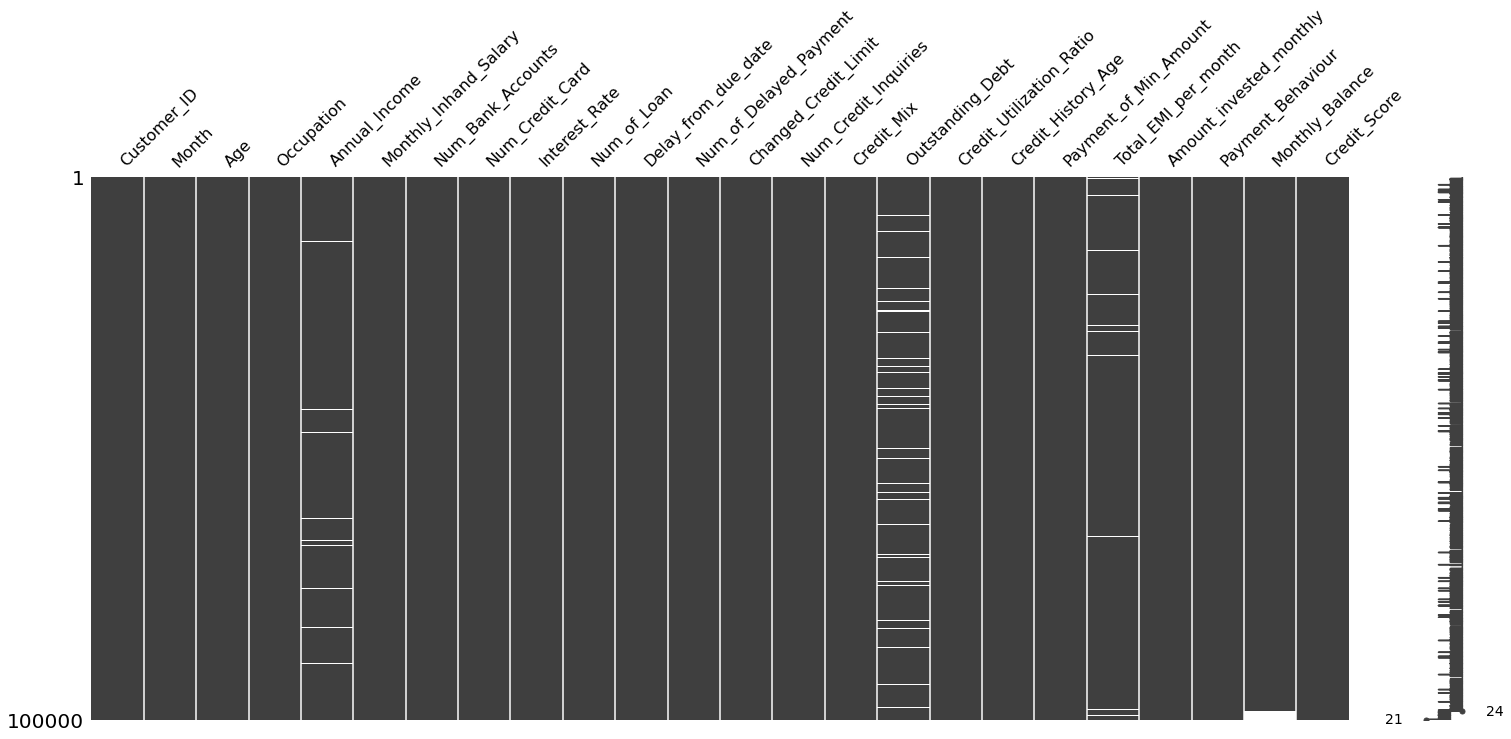

In [28]:
msno.matrix(train_data)

In [29]:
train_data.dropna(inplace=True)

In [30]:
train_data.drop(columns=['Customer_ID'], axis=1, inplace=True)

In [31]:
train_data['Credit_Score'] = train_data['Credit_Score'].map({'Poor':1, 'Standard':2, 'Good':3})

In [32]:
train_data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
0x1603,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,Good,809.98,31.944960,22.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,3
0x1604,March,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3
0x1605,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
0x1606,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x255f9,April,38.0,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,9.0,...,Good,599.40,31.936092,25.0,NM,25.671257,387.541439,Low_spent_Small_value_payments,192.083554,2
0x255fa,May,38.0,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,9.0,...,Good,599.40,26.268474,25.0,No,25.671257,76.057218,High_spent_Large_value_payments,453.567775,2
0x255fb,June,38.0,Lawyer,41015.55,3152.962500,0.0,4.0,4.0,1.0,9.0,...,Good,599.40,28.754729,25.0,No,25.671257,91.198586,High_spent_Medium_value_payments,448.426407,2


In [33]:
clean_train_data = train_data.copy()

In [34]:
# Encode month manually

clean_train_data['Month'] = clean_train_data['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [35]:
y = clean_train_data['Credit_Score']
X = clean_train_data.drop(columns=['Credit_Score'], axis=1)

In [36]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
categorical_cols

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [37]:
low_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()<4)]
low_cardinality_categorical_cols

['Credit_Mix', 'Payment_of_Min_Amount']

In [38]:
high_cardinality_categorical_cols = [col for col in X.columns if 
                                    (X[col].dtype == 'object') & 
                                    (X[col].nunique()>3)]

high_cardinality_categorical_cols

['Occupation', 'Payment_Behaviour']

In [39]:
OH_X = pd.get_dummies(X[low_cardinality_categorical_cols])
OH_X

,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
ID,,,,,,
0x1602,0,1,0,0,1,0
0x1603,0,1,0,0,1,0
0x1604,0,1,0,0,1,0
0x1605,0,1,0,0,1,0
0x1606,0,1,0,0,1,0
...,...,...,...,...,...,...
0x255f9,0,1,0,1,0,0
0x255fa,0,1,0,0,1,0
0x255fb,0,1,0,0,1,0


In [40]:
ord_encoder = OrdinalEncoder()
ORD_X = pd.DataFrame(ord_encoder.fit_transform(X[high_cardinality_categorical_cols]), index=X[high_cardinality_categorical_cols].index, columns=X[high_cardinality_categorical_cols].columns)
ORD_X

,Occupation,Payment_Behaviour
ID,,
0x1602,12.0,2.0
0x1603,12.0,3.0
0x1604,12.0,4.0
0x1605,12.0,5.0
0x1606,12.0,1.0
...,...,...
0x255f9,7.0,5.0
0x255fa,7.0,0.0
0x255fb,7.0,1.0


In [41]:
categorical_X = ORD_X.join(OH_X)

In [42]:
# Numerical Cols
numerical_cols = [col for col in X.columns if 
                 (X[col].dtype == 'float64')|
                 (X[col].dtype == 'int64')]

In [43]:
X[numerical_cols].head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,
0x1602,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,22.0,49.574949,80.415295,312.494089
0x1603,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,4.0,809.98,31.944960,22.0,49.574949,118.280222,284.629162
0x1604,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,4.0,809.98,28.609352,22.0,49.574949,81.699521,331.209863
0x1605,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,22.0,49.574949,199.458074,223.451310
0x1606,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,22.0,49.574949,41.420153,341.489231


In [44]:
numerical_X = X[numerical_cols]

In [45]:
cols_for_scaled = ['Annual_Income', 
                   'Monthly_Inhand_Salary', 
                   'Outstanding_Debt', 
                   'Credit_Utilization_Ratio', 
                   'Credit_History_Age', 
                   'Total_EMI_per_month', 
                   'Amount_invested_monthly',
                   'Monthly_Balance']

scaler = MinMaxScaler()
numerical_scaled_X = pd.DataFrame(scaler.fit_transform(numerical_X[cols_for_scaled]), 
                                  index=numerical_X[cols_for_scaled].index, 
                                  columns=numerical_X[cols_for_scaled].columns)

In [46]:
numerical_X[cols_for_scaled] = numerical_scaled_X

In [47]:
numerical_X

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,
0x1602,1,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,0.201725,0.244206,0.666667,0.138708,0.008042,1.0
0x1603,2,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,4.0,0.201725,0.427553,0.666667,0.138708,0.011828,1.0
0x1604,3,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,3.0,7.0,6.27,4.0,0.201725,0.308159,0.666667,0.138708,0.008170,1.0
0x1605,4,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,0.201725,0.407254,0.666667,0.138708,0.019946,1.0
0x1606,5,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,0.201725,0.171714,0.666667,0.138708,0.004142,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x255f9,4,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,1.58,2.0,0.149266,0.427235,0.757576,0.071827,0.038754,1.0
0x255fa,5,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,1.58,2.0,0.149266,0.224371,0.757576,0.071827,0.007606,1.0
0x255fb,6,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,1.58,2.0,0.149266,0.313363,0.757576,0.071827,0.009120,1.0


In [48]:
Final_X = numerical_X.join(categorical_X)

In [49]:
Final_X

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Amount_invested_monthly,Monthly_Balance,Occupation,Payment_Behaviour,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,1,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,3.0,7.0,...,0.008042,1.0,12.0,2.0,0,1,0,0,1,0
0x1603,2,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,-1.0,7.0,...,0.011828,1.0,12.0,3.0,0,1,0,0,1,0
0x1604,3,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,3.0,7.0,...,0.008170,1.0,12.0,4.0,0,1,0,0,1,0
0x1605,4,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,5.0,4.0,...,0.019946,1.0,12.0,5.0,0,1,0,0,1,0
0x1606,5,23.0,0.083178,0.120751,3.0,4.0,3.0,4.0,6.0,4.0,...,0.004142,1.0,12.0,1.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x255f9,4,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,...,0.038754,1.0,7.0,5.0,0,1,0,1,0,0
0x255fa,5,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,...,0.007606,1.0,7.0,0.0,0,1,0,0,1,0
0x255fb,6,38.0,0.233633,0.226176,0.0,4.0,4.0,1.0,9.0,1.0,...,0.009120,1.0,7.0,1.0,0,1,0,0,1,0


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Final_X,y,test_size=0.20,random_state=500)

# LOGISTIC CLASSIFIER

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred_train_lr=lr.predict(x_train)
y_pred_test_lr=lr.predict(x_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [55]:
lr.coef_

array([[-9.56478142e-02, -2.28549841e-02, -2.57699149e-02,
        -2.54845249e-02, -6.04852914e-02,  6.62428642e-02,
         4.53233000e-02,  4.86054455e-02,  2.77288823e-02,
        -6.23969844e-06, -4.51370691e-02,  1.12408240e-01,
         2.70461379e-02, -2.05858678e-02, -5.38245080e-02,
        -9.57031352e-03, -3.40115334e-03, -4.56713266e-02,
        -1.74485902e-02,  1.09051078e-02,  3.75681681e-02,
         1.15977780e-02, -9.48686861e-02, -6.24613014e-03,
        -3.32766211e-02, -6.17998876e-03],
       [-2.67034465e-02,  1.35322054e-03,  9.10590468e-03,
         9.51583341e-03,  1.02768609e-01,  4.40907153e-02,
        -7.33543710e-03, -3.33843488e-02,  4.47401981e-03,
         5.94191366e-05,  3.76709553e-02, -3.93194629e-02,
        -2.54279243e-02,  9.41126985e-03,  2.34856554e-02,
         1.81253590e-03,  1.56822123e-03,  2.15176067e-02,
         2.71700351e-03,  5.63282825e-03, -3.47207040e-02,
        -1.25430146e-01,  1.81728573e-01, -1.35129475e-03,
        -3.50

In [56]:
lr.intercept_

array([-0.04570315,  0.02157793,  0.02412522])

In [59]:
print(confusion_matrix(y_train,y_pred_train_lr))
print('*'*20)
print(confusion_matrix(y_test,y_pred_test_lr))

[[10134  9116   956]
 [ 4728 30056  3589]
 [  458  7312  5343]]
********************
[[2552 2259  262]
 [1138 7548  917]
 [ 115 1836 1297]]


In [60]:
print(classification_report(y_train,y_pred_train_lr))
print('*'*20)
print(classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

           1       0.66      0.50      0.57     20206
           2       0.65      0.78      0.71     38373
           3       0.54      0.41      0.46     13113

    accuracy                           0.64     71692
   macro avg       0.62      0.56      0.58     71692
weighted avg       0.63      0.64      0.62     71692

********************
              precision    recall  f1-score   support

           1       0.67      0.50      0.57      5073
           2       0.65      0.79      0.71      9603
           3       0.52      0.40      0.45      3248

    accuracy                           0.64     17924
   macro avg       0.61      0.56      0.58     17924
weighted avg       0.63      0.64      0.63     17924



In [61]:
print(accuracy_score(y_train, y_pred_train_lr))
print("\n")
print(accuracy_score(y_test, y_pred_test_lr))

0.6351196786252301


0.6358513724615041


# DECISION TREE CLASSIFIER

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [64]:
y_pred_g_train=dt_gini.predict(x_train)
y_pred_g_test=dt_gini.predict(x_test)
y_pred_e_train=dt_entropy.predict(x_train)
y_pred_e_test=dt_entropy.predict(x_test)

In [65]:
print(accuracy_score(y_train,y_pred_g_train))
print("\n")
print(accuracy_score(y_test,y_pred_g_test))
print("\n")
print(accuracy_score(y_train,y_pred_e_train))
print("\n")
print(accuracy_score(y_test,y_pred_e_test))

1.0


0.7330395001115823


1.0


0.7371122517295247


In [66]:
from sklearn.model_selection import cross_val_score
accuracy_train_gini=cross_val_score(dt_gini,X=x_train,y=y_train,cv=15)
accuracy_test_gini=cross_val_score(dt_gini,X=x_test,y=y_test,cv=15)
print(accuracy_train_gini)
print('\n')
print(accuracy_test_gini)

[0.7332636  0.73054393 0.73786611 0.73117155 0.73054393 0.72426778
 0.7332636  0.72462858 0.73383553 0.73634652 0.73634652 0.72504708
 0.72148985 0.73906675 0.74220548]


[0.66276151 0.64937238 0.68284519 0.67866109 0.66610879 0.65606695
 0.69707113 0.68619247 0.68786611 0.65606695 0.65439331 0.67615063
 0.67364017 0.65690377 0.6641541 ]


In [67]:
from sklearn.model_selection import cross_val_score
accuracy_train_entropy=cross_val_score(dt_entropy,X=x_train,y=y_train,cv=15)
accuracy_test_entropy=cross_val_score(dt_entropy,X=x_test,y=y_test,cv=15)
print(accuracy_train_entropy)
print('\n')
print(accuracy_test_entropy)

[0.73723849 0.73891213 0.73640167 0.73138075 0.72845188 0.73723849
 0.72573222 0.74450722 0.73425403 0.73425403 0.72421009 0.73760201
 0.73006905 0.739276   0.74555346]


[0.66694561 0.67531381 0.66945607 0.68953975 0.67615063 0.66192469
 0.67531381 0.66861925 0.69288703 0.65941423 0.66276151 0.68953975
 0.64686192 0.66861925 0.67252931]


# RANDOM FOREST CLASSIFIER

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500,criterion='gini')
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [69]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [70]:
print(accuracy_score(y_train, y_pred_rf_train))
print("\n")
print(accuracy_score(y_test, y_pred_rf_test))

1.0


0.8317897790671726


In [71]:
from sklearn.model_selection import cross_val_score
accuracy_test = cross_val_score(rf_model, X=x_test, y=y_test, cv = 20)
print(accuracy_test)

[0.77369008 0.7335563  0.78037904 0.78037904 0.79910714 0.73995536
 0.78683036 0.75669643 0.76785714 0.77566964 0.77901786 0.79464286
 0.75223214 0.765625   0.75892857 0.77008929 0.76450893 0.76897321
 0.77566964 0.77678571]


# KNN CLASSIFIER

In [72]:
x_knn=Final_X

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_knn)
scaled_features=scaler.transform(x_knn)

In [74]:
df_feat=pd.DataFrame(scaled_features,columns=x_knn.columns)
df_feat

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Amount_invested_monthly,Monthly_Balance,Occupation,Payment_Behaviour,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-1.527525,-0.973633,-0.832841,-0.750903,-0.883890,-0.707943,-1.296442,0.299320,-1.261965,-0.104660,...,-0.269474,0.010022,1.174079,-0.416337,-0.495721,1.491718,-0.985465,-0.369178,1.304062,-1.019722
1,-1.091089,-0.973633,-0.832841,-0.750903,-0.883890,-0.707943,-1.296442,0.299320,-1.575721,-0.104660,...,-0.250969,0.010022,1.174079,0.125872,-0.495721,1.491718,-0.985465,-0.369178,1.304062,-1.019722
2,-0.654654,-0.973633,-0.832841,-0.750903,-0.883890,-0.707943,-1.296442,0.299320,-1.261965,-0.104660,...,-0.268847,0.010022,1.174079,0.668080,-0.495721,1.491718,-0.985465,-0.369178,1.304062,-1.019722
3,-0.218218,-0.973633,-0.832841,-0.750903,-0.883890,-0.707943,-1.296442,0.299320,-1.105088,-0.117876,...,-0.211296,0.010022,1.174079,1.210289,-0.495721,1.491718,-0.985465,-0.369178,1.304062,-1.019722
4,0.218218,-0.973633,-0.832841,-0.750903,-0.883890,-0.707943,-1.296442,0.299320,-1.026649,-0.117876,...,-0.288532,0.010022,1.174079,-0.958546,-0.495721,1.491718,-0.985465,-0.369178,1.304062,-1.019722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89611,-0.218218,0.409727,-0.206319,-0.294423,-2.056618,-0.707943,-1.179240,-0.996602,-0.791332,-0.131092,...,-0.119377,0.010022,0.012308,1.210289,-0.495721,1.491718,-0.985465,2.708717,-0.766835,-1.019722
89612,0.218218,0.409727,-0.206319,-0.294423,-2.056618,-0.707943,-1.179240,-0.996602,-0.791332,-0.131092,...,-0.271604,0.010022,0.012308,-1.500754,-0.495721,1.491718,-0.985465,-0.369178,1.304062,-1.019722
89613,0.654654,0.409727,-0.206319,-0.294423,-2.056618,-0.707943,-1.179240,-0.996602,-0.791332,-0.131092,...,-0.264204,0.010022,0.012308,-0.958546,-0.495721,1.491718,-0.985465,-0.369178,1.304062,-1.019722
89614,1.091089,0.409727,-0.206319,-0.294423,-2.056618,-0.707943,-1.179240,-0.996602,-0.791332,-0.122281,...,-0.208182,0.010022,0.012308,-0.416337,-0.495721,1.491718,-0.985465,-0.369178,1.304062,-1.019722


In [75]:
x_knn= df_feat

In [76]:
from sklearn.model_selection import train_test_split
x_train_knn,x_test_knn,y_train,y_test=train_test_split(x_knn,y,train_size=0.75,random_state=555)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_knn,y_train)

KNeighborsClassifier(n_neighbors=10)

In [88]:
y_pred_knn_train=knn.predict(x_train_knn)
y_pred_knn_test=knn.predict(x_test_knn)

In [89]:
print(confusion_matrix(y_train,y_pred_knn_train))
print("\n")
print(confusion_matrix(y_test,y_pred_knn_test))

[[14506  3398   992]
 [ 4099 29539  2411]
 [  379  3779  8109]]


[[4504 1451  428]
 [1565 9252 1110]
 [ 167 1493 2434]]


In [90]:
print(classification_report(y_train,y_pred_knn_train))
print("\n")
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           1       0.76      0.77      0.77     18896
           2       0.80      0.82      0.81     36049
           3       0.70      0.66      0.68     12267

    accuracy                           0.78     67212
   macro avg       0.76      0.75      0.75     67212
weighted avg       0.77      0.78      0.78     67212



              precision    recall  f1-score   support

           1       0.72      0.71      0.71      6383
           2       0.76      0.78      0.77     11927
           3       0.61      0.59      0.60      4094

    accuracy                           0.72     22404
   macro avg       0.70      0.69      0.69     22404
weighted avg       0.72      0.72      0.72     22404



In [91]:
print(accuracy_score(y_train,y_pred_knn_train))
print("\n")
print(accuracy_score(y_test,y_pred_knn_test))

0.7759626257215974


0.7226388144974112
